In [1]:
import sys
import os
import math
current_dir = os.getcwd()
sys.path.append(os.path.dirname(os.path.abspath(current_dir)))

import qiskit
from shor_algorithm.shor_algo_adder_method import adder, set_start_state, qft, qft_dagger
import save_data_to_file

from Result.result import ResultData

from qiskit.visualization import plot_histogram, plot_coupling_map
from backend_operation import run_simulator, get_transpiled_circuits_of_circuit, get_fake_backend_list,get_unitary, get_fake_backend, get_fake_backend_list
from qiskit import transpile

from qiskit.visualization import plot_histogram, plot_coupling_map
from backend_operation import run_simulator, get_transpiled_circuits_of_circuit, get_fake_backend_list,get_unitary, get_fake_backend, get_fake_backend_list
from qiskit import transpile
import qiskit.providers.fake_provider
from qiskit_ibm_provider import IBMProvider
from qiskit.transpiler.passes import RemoveBarriers
from qiskit_aer import AerSimulator, Aer

from Backend.fake_backend import FakeBackend
from Backend.backend import Backend
from Backend.ibm_backend import IBM_backend

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile



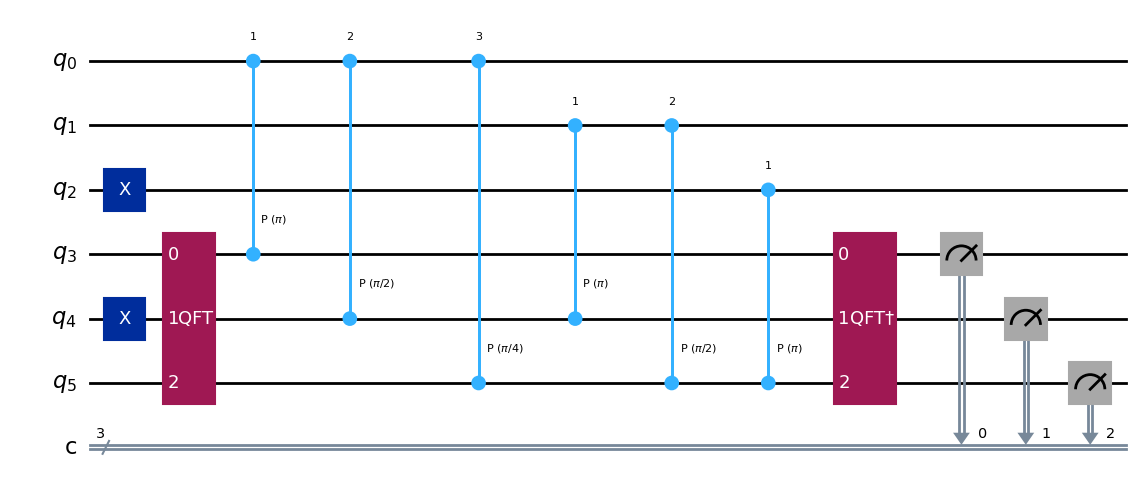

In [2]:
n = 6
q = QuantumRegister(n, 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

main = QuantumCircuit(q, c)

a = 4
b = 2

set_start_state(main, a, 0)
set_start_state(main, b, n//2)


main.append(qft(math.ceil(n/2), False), range(n//2, n))
main = main.compose(adder(n//2, kind="fixed"), qubits=range(n))
# main.append(adder(n//2, kind="fixed"), range(n))
main.append(qft_dagger(math.ceil(n/2), False), range(n//2, n))


main.measure(range(n//2, n), range(math.ceil(n/2)))

main.draw('mpl')



In [3]:
generic_backend = Backend(n)
backend_names = FakeBackend.get_ibm_fake_backend_names_with_limit(n)
fake_auckland_backend = FakeBackend.get_ibm_fake_backend('fake_auckland')
print(f"Fake Auckland number of qubits = {fake_auckland_backend.num_qubits}")

qc_transpile = generic_backend.transpile_save_param(qc=main, optimization_level=0, initial_layout=None, seed_transpiler=None, input_num1=a, input_num2=b)

Fake Auckland number of qubits = 27


In [4]:
qc_res  = qc_transpile.backend.run(qc_transpile.transpiled_qc, shots=1024, seed_simulator=None)
result = ResultData(qc_res)


In [5]:
seed = 42
qc_res_seed  = qc_transpile.backend.run(qc_transpile.transpiled_qc, shots=1024, seed_simulator=seed)
result_seed = ResultData(qc_res_seed)
result_seed.set_seed(seed)

In [6]:
print(qc_transpile.to_dict())
print(result.to_dict())

{'backend': <Backend.backend.Backend object at 0x000001DA943D7980>, 'backend_name': 'generic_backend_6q', 'initial_layout': None, 'input_num1': 4, 'input_num2': 2, 'optimization_level': 0, 'original_qc': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001DA9324A570>, 'original_qc_depth': 9, 'seed_transpiler': None, 'transpiled_qc': <quantum_circuit.QuantumCircuit object at 0x000001DA942E4E90>, 'transpiled_qc_depth': 51}
{'seed_simulator': None, 'counts': {'110': 935, '010': 33, '000': 20, '111': 8, '101': 2, '100': 18, '011': 5, '001': 3}, 'time_taken': 0.24135541915893555, 'result_time_taken': [0.0635051]}


In [7]:
excel_path = "D:/myProjects/AfekaCodeProjects/codeProjects/FinalProject_qiskit/qiskit_algorithm/logs"
excel_name = "adder_circ.csv"

save = save_data_to_file.CSVWriter(excel_path, excel_name)

data = [[qc_transpile, result], [qc_transpile, result_seed]]

save.save_data(data)

Data saved to D:/myProjects/AfekaCodeProjects/codeProjects/FinalProject_qiskit/qiskit_algorithm/logs\adder_circ.csv
